# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for j in range(0,n):
            positions[j+1] = positions[j]+self.pickStep()
        return positions

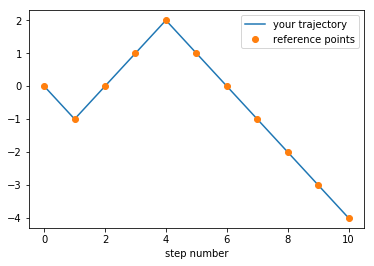

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

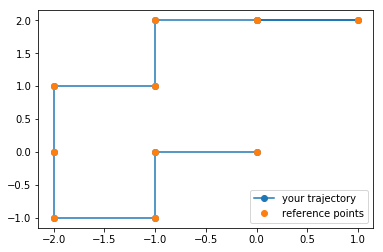

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

In [5]:
reference[0][0]
n=5

pos=numpy.ndarray((n+1,2),dtype='f')
print(pos)
pos[0,1]

[[4.1723254e-08 2.9875000e+00]
 [4.1723254e-08 2.9875000e+00]
 [4.1723254e-08 2.9875000e+00]
 [4.1723254e-08 2.9875000e+00]
 [4.1723254e-08 2.9875000e+00]
 [4.1723254e-08 2.9875000e+00]]


2.9875

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

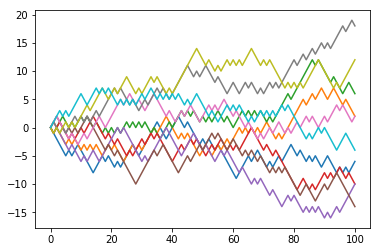

In [6]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


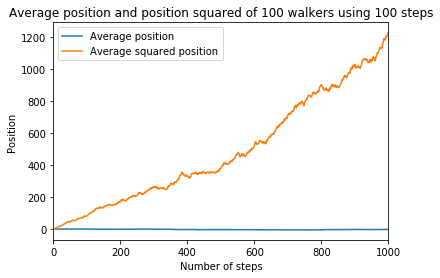

In [7]:
nsteps = 1000
ndim = 1
nwalkers = 100
walkerarray = numpy.zeros((nsteps+1,nwalkers))
for i in range(0,nwalkers):
    w = walker(numpy.zeros(1))
    y1 = w.doSteps(nsteps)
    walkerarray[:,i] = numpy.transpose(y1)
x=[]
for i in range(0,nsteps+1):
    x.append(i)
avg = numpy.zeros(nsteps+1)
avg2 = numpy.zeros(nsteps+1)
for i in range(0,nsteps+1):
    avg[i] = numpy.average(walkerarray[i,:])
    avg2[i] = numpy.average(numpy.square(walkerarray[i,:]))
plt.plot(x,avg,label="Average position")
plt.plot(x,avg2,label="Average squared position")
plt.xlim(0,1000)
plt.xlabel("Number of steps")
plt.ylabel("Position")
plt.title("Average position and position squared of 100 walkers using 100 steps")
plt.legend()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


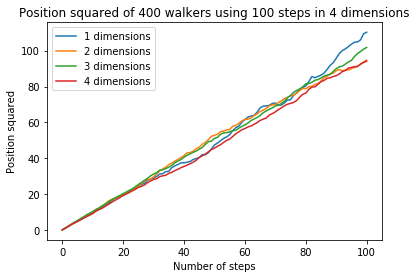

In [10]:
nsteps = 100
nwalkers = 400
dtest = range(1,5)
x2dims = numpy.zeros((4,nsteps+1))
x = []
for u in range(0,nsteps+1):
    x.append(u)
for j in dtest:
    sum_sqr_walks = numpy.zeros(nsteps+1)
    x2 = numpy.zeros((nsteps+1,1))
    xs = numpy.zeros((nwalkers,nsteps+1))
    one_walk = numpy.zeros((j,nsteps+1))
    many_walks = numpy.zeros((j,nsteps+1))
    for i in range(0,nwalkers):
        w = walker(numpy.zeros(j),ndim=j)
        run = w.doSteps(nsteps)
        one_walk = one_walk + (numpy.transpose(run)**2)
    avg_many_walks = one_walk/nwalkers
    for a in range(0,nsteps+1):
        sum_sqr_walks[a] = numpy.sum((avg_many_walks[:,a]))
    plt.plot(x,sum_sqr_walks,label=str(j)+' dimensions')
plt.xlabel("Number of steps")
plt.ylabel("Position squared")
plt.title("Position squared of 400 walkers using 100 steps in 4 dimensions")
plt.legend()
#        for l in range(0,nsteps+1):
#            for f in dtest:

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


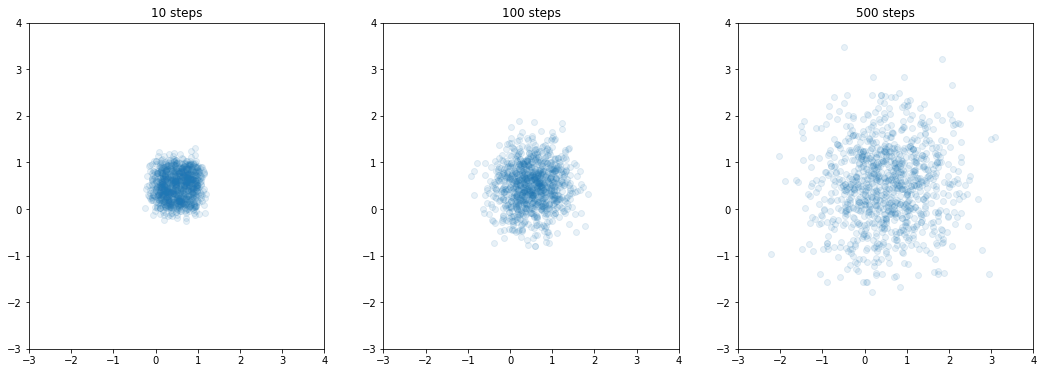

In [117]:
ndim=2
nwalkers=1000
stepsize = 0.05
rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
ten = numpy.random.uniform(size=(nwalkers, ndim))
oneh = numpy.random.uniform(size=(nwalkers, ndim))
fiveh = numpy.random.uniform(size=(nwalkers, ndim))
current_pos = rand_pos

for i in range(0,nwalkers):
    w = walker(numpy.zeros(ndim),ndim=ndim)
    run = w.doSteps(500)
    step_10 = run[10,:]
    pos_10 = step_10*0.05+rand_pos[i,:]
    ten[i,:] = pos_10
    step_100 = run[100,:]
    pos_100 = step_100*0.05+rand_pos[i,:]
    oneh[i,:] = pos_100
    step_500 = run[500,:]
    pos_500 = step_500*0.05+rand_pos[i,:]
    fiveh[i,:] = pos_500

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.xlim((-3, 4))
plt.ylim((-3, 4))
plt.title("10 steps")    
plt.scatter(ten[:,0], ten[:,1], alpha=0.1)

plt.subplot(132)
plt.xlim((-3, 4))
plt.ylim((-3, 4))
plt.title("100 steps")    
plt.scatter(oneh[:,0], oneh[:,1], alpha=0.1)

plt.subplot(133)
plt.xlim((-3, 4))
plt.ylim((-3, 4))
plt.title("500 steps")    
plt.scatter(fiveh[:,0], fiveh[:,1], alpha=0.1)



In [ ]:
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)